In [1]:
library(Seurat)


Attaching SeuratObject



<h1>(Morris et al. 2022)</h1

In [2]:
#ovary_0.rds
pbmc <- readRDS("data/ovary_0.rds")

In [3]:
pbmc


An object of class Seurat 
23657 features across 34712 samples within 1 assay 
Active assay: RNA (23657 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

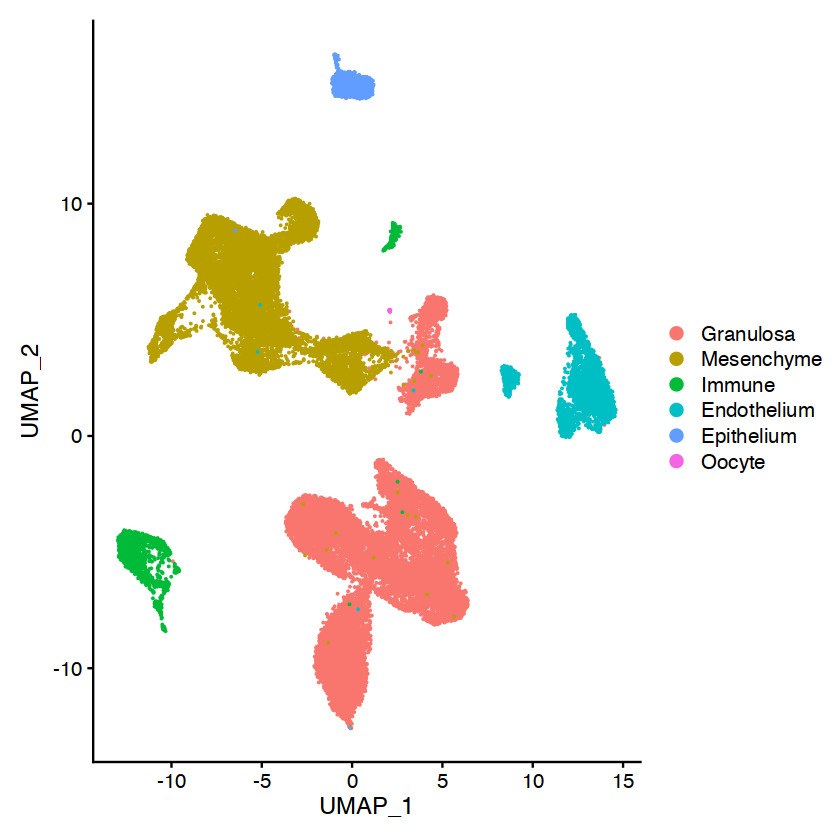

In [4]:
DimPlot(pbmc, reduction = "umap",raster=FALSE)

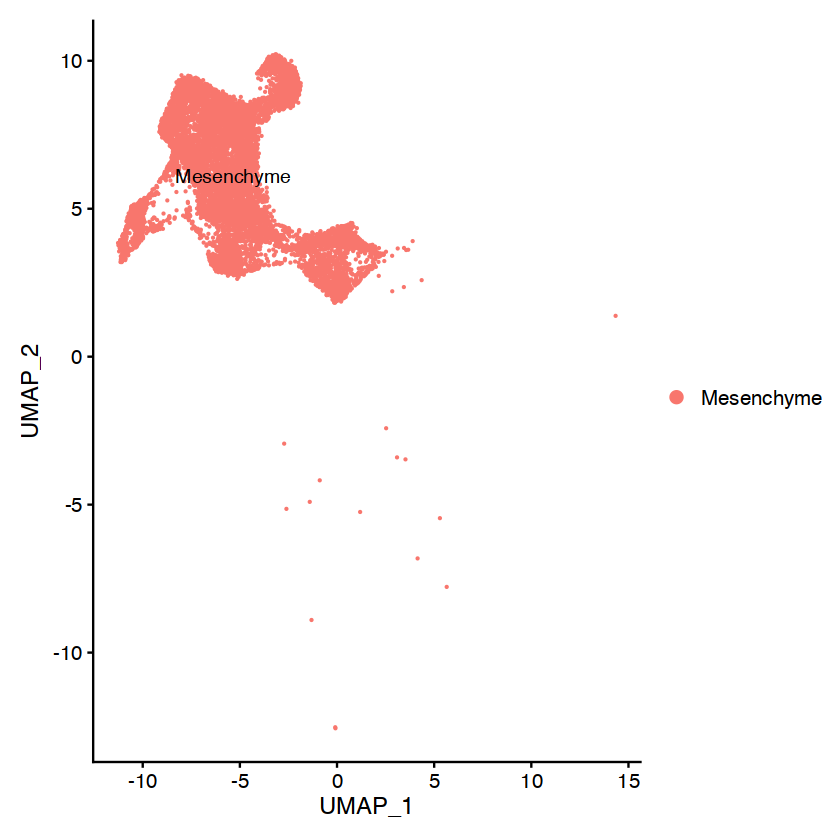

In [5]:
pbmc = subset(x = pbmc, idents = c("Mesenchyme"))
DimPlot(pbmc, reduction = "umap", label =TRUE)

In [6]:
head(pbmc@meta.data)

,nGene,nUMI,orig.ident,batch,fraction.mito,condition,dominant_index,percent_dominant,Level0,doubletSimScore,doubletSimCall,mouse,Level1,Level2,nCount_RNA,nFeature_RNA
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<int>
mary_34557529_1.1.1A_000010,1349,2322,mary,cycling,0.1210164,E,0,100,Mesenchyme,0.16326531,0,1A,M_Steroidogenic Theca,M_Steroidogenic Theca,2576.116,1349
mary_34557529_1.1.1A_000191,1513,2734,mary,cycling,0.1002195,E,0,100,Mesenchyme,0.14408163,0,1A,M_Steroidogenic Theca,M_Steroidogenic Theca,2715.914,1513
mary_34557529_1.1.1A_000375,1368,2761,mary,cycling,0.1365447,E,5,100,Mesenchyme,0.09857143,0,1A,M_Steroidogenic Theca,M_Steroidogenic Theca,2481.189,1368
mary_34557529_1.1.1A_004602,1929,4398,mary,cycling,0.1136880,E,0,100,Mesenchyme,0.13693878,0,1A,M_Steroidogenic Theca,M_Steroidogenic Theca,2888.613,1929
mary_34557529_1.1.1A_006093,878,1491,mary,cycling,0.1193830,E,0,100,Mesenchyme,0.13000000,0,1A,M_Steroidogenic Theca,M_Steroidogenic Theca,2006.842,878
mary_34557529_1.1.1A_007365,1367,2772,mary,cycling,0.1414141,E,1,100,Mesenchyme,0.12755102,0,1A,M_Steroidogenic Theca,M_Steroidogenic Theca,2465.207,1367


In [7]:
pbmc<- pbmc[-grep("^mt.", rownames(pbmc))] 

In [8]:
pbmc <- NormalizeData(pbmc, normalization.method = "CLR", scale.factor = 10000)

Normalizing across features

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.9 GiB”


In [9]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
pbmc <- ScaleData(pbmc)


Centering and scaling data matrix



PC_ 1 
Positive:  Col1a2, Bgn, Col1a1, Mgp, Fstl1, Mylk, Sparcl1, Cfh, Ltbp4, Tmsb4x 
	   Igfbp7, Actn1, Serping1, Col4a1, Col4a2, Cygb, Tcf21, Lhfp, Nid1, Mfap2 
	   Id3, Emilin1, Col5a1, Csrp1, Timp2, Acta2, Tuba1a, Rarres2, Cyp1b1, Mdk 
Negative:  Aldh1a1, Mgarp, Acsbg1, Cyp11a1, Fdx1, Hsd3b1, Me1, Hao2, Folr1, Akr1cl 
	   Serpina5, Dnajc15, Prlr, Cyp17a1, Pank1, Prss35, Gramd1b, Tmem86a, Ephx1, Pak3 
	   E330017L17Rik, Fam213a, Efhd1, Nr5a1, Slc45a3, Aldh1b1, Soat1, Bpifb4, Clu, Mt1 
PC_ 2 
Positive:  Rgs5, Ndufa4l2, Notch3, Rgs4, Gja4, Ebf1, Serpini1, Gm13889, Rasl12, Olfr558 
	   Esam, Tinagl1, Nrarp, Ptp4a3, Ehd3, Itga7, Col18a1, Cspg4, Steap4, Tm4sf1 
	   S1pr3, Ano1, Crip1, Epas1, Gpc6, Cpm, Bcam, Abcc9, Sept4, Colec11 
Negative:  Sulf2, Ogn, Itih5, Col1a1, Cyp1b1, Dcn, Htra3, Ptprd, Thbs1, Lum 
	   Mmp2, Tenm4, Mfap4, Pdgfra, Gas5, Thbs4, Col6a1, Arx, Cxcl14, Fgl2 
	   Cfh, Mfap5, Kcnk2, Tcf21, X1190002N15Rik, Tsc22d1, Col1a2, Apoe, Foxo1, Col11a1 
PC_ 3 
Positive:  Enpep, Ad

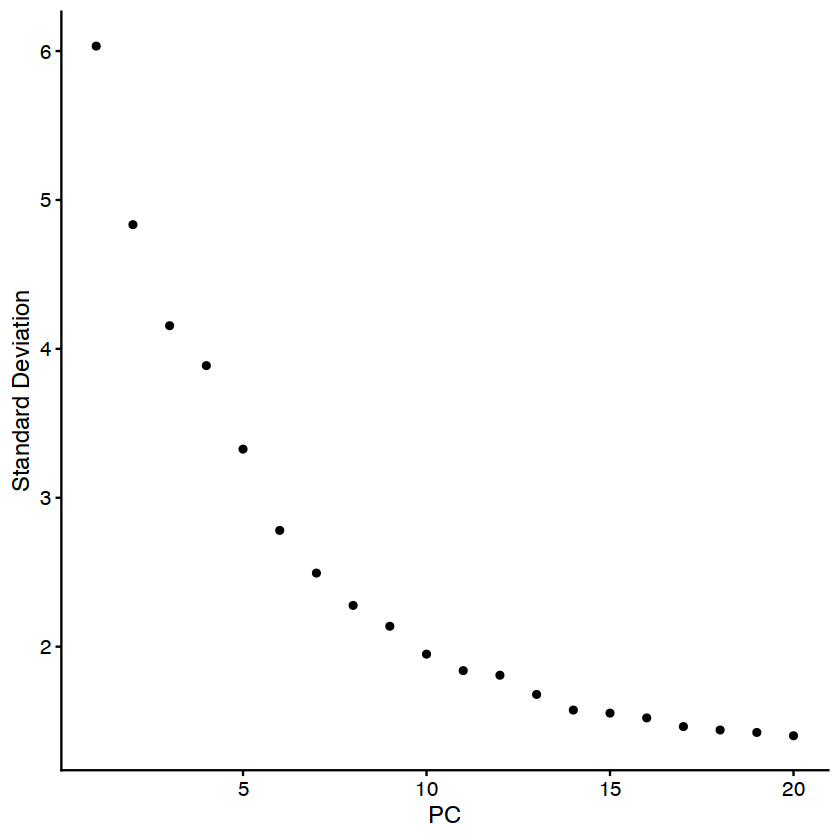

In [10]:
pbmc <- RunPCA(pbmc)
ElbowPlot(pbmc)

In [11]:
pbmc <- FindNeighbors(pbmc, dims = c(1:15))
pbmc <- FindClusters(pbmc, resolution = 0.3)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10825
Number of edges: 369737

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9090
Number of communities: 7
Elapsed time: 1 seconds


In [12]:
# min.dist = 0.1
pbmc <- RunUMAP(pbmc, reduction = "pca", dims = c(1:15), 
  spread = 1, min.dist = 0.2)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:08:35 UMAP embedding parameters a = 1.262 b = 1.003

17:08:35 Read 10825 rows and found 15 numeric columns

17:08:35 Using Annoy for neighbor search, n_neighbors = 30

17:08:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:08:36 Writing NN index file to temp file /var/folders/9q/bcmy70lj3f7_0km479f7zckh0000gp/T//RtmpJD7Wkg/file72073b70544d

17:08:36 Searching Annoy index using 1 thread, search_k = 3000

17:08:39 Annoy recall = 100%

17:08:39 Commencing smooth kNN distance calibrat

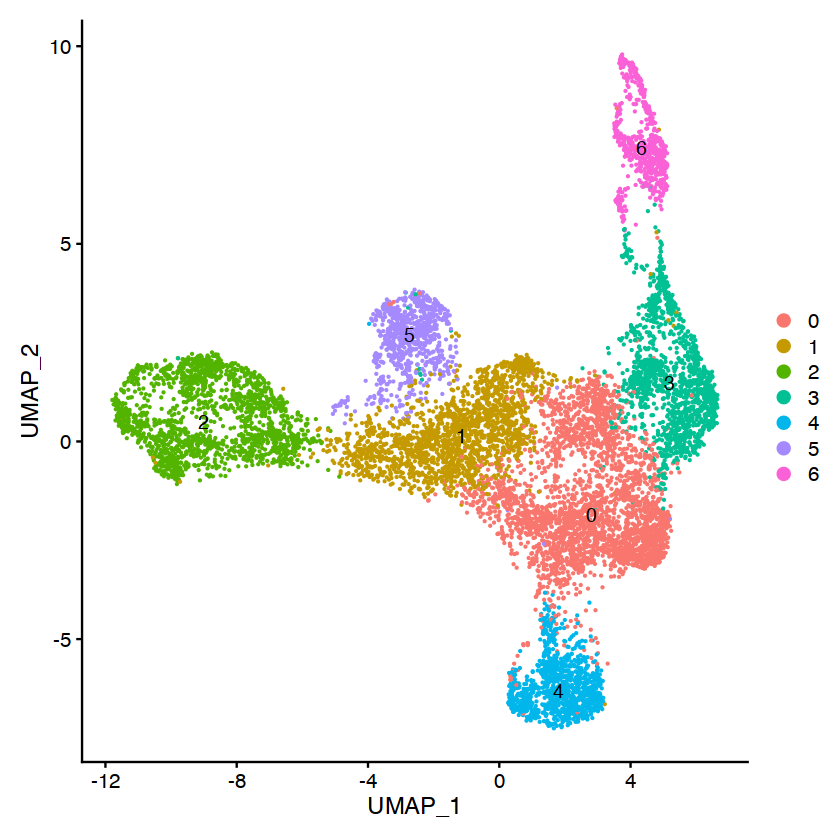

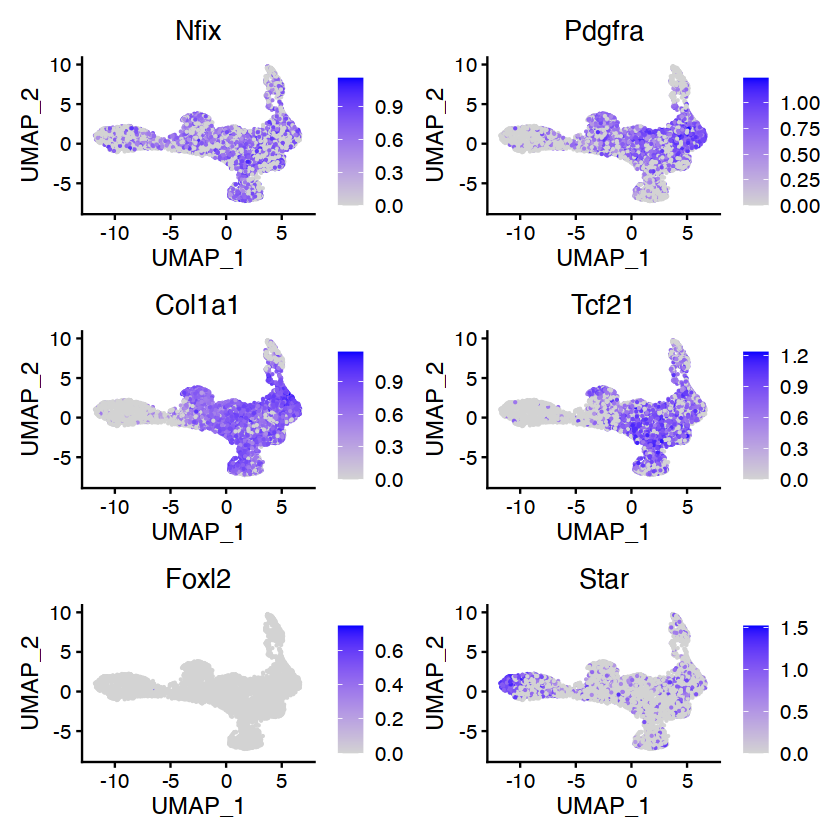

In [13]:
#Mesenchyme
DimPlot(pbmc, reduction = "umap", label =TRUE,raster=FALSE)
FeaturePlot(pbmc, features = c("Nfix","Pdgfra","Col1a1","Tcf21","Foxl2","Star"),raster=FALSE)


In [14]:
colnames(pbmc[[]])

[1] "nGene"            "nUMI"             "orig.ident"       "batch"           
 [5] "fraction.mito"    "condition"        "dominant_index"   "percent_dominant"
 [9] "Level0"           "doubletSimScore"  "doubletSimCall"   "mouse"           
[13] "Level1"           "Level2"           "nCount_RNA"       "nFeature_RNA"    
[17] "RNA_snn_res.0.3"  "seurat_clusters"

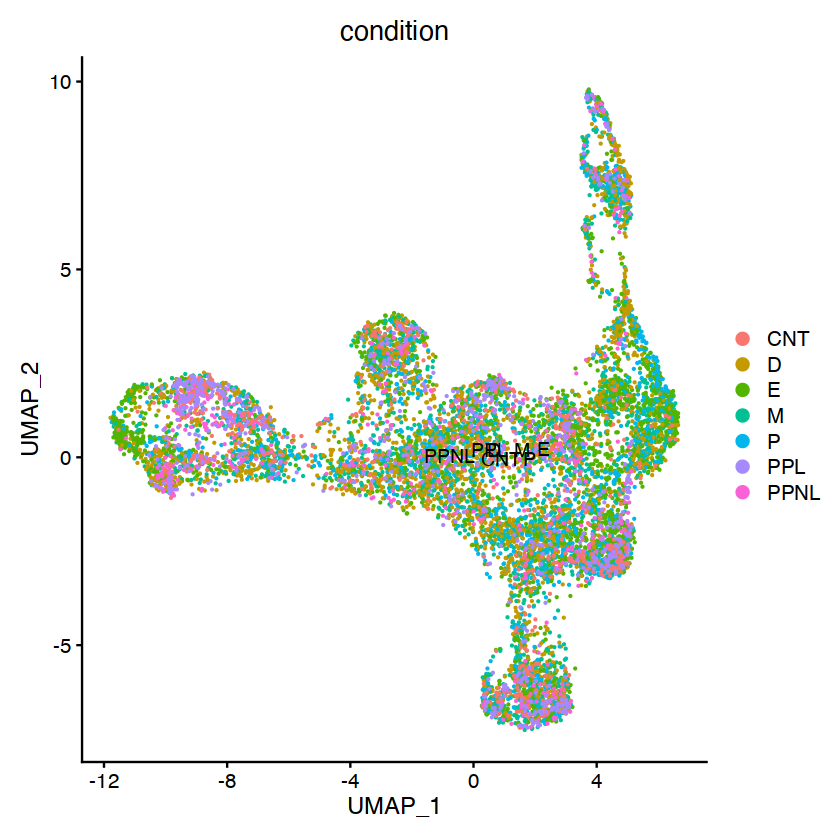

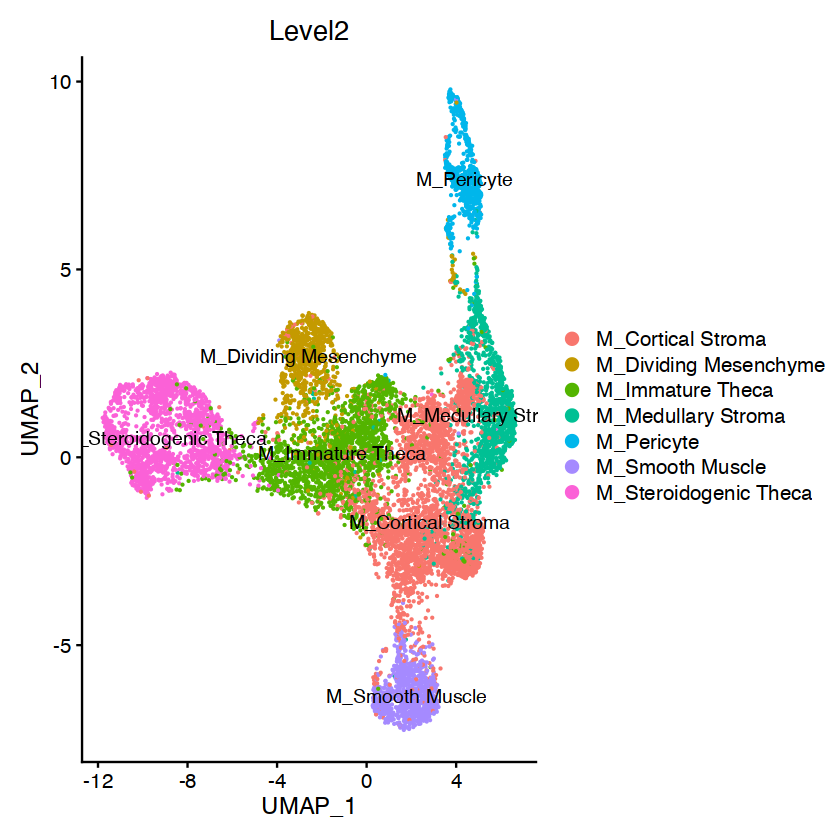

In [15]:
DimPlot(pbmc, reduction = "umap", label =TRUE,raster=FALSE, group.by = "condition")
DimPlot(pbmc, reduction = "umap", label =TRUE,raster=FALSE, group.by = "Level2")


In [16]:
pbmc = subset(x = pbmc, idents = c("5"), invert = TRUE)

In [17]:
colnames(pbmc[[]])

[1] "nGene"            "nUMI"             "orig.ident"       "batch"           
 [5] "fraction.mito"    "condition"        "dominant_index"   "percent_dominant"
 [9] "Level0"           "doubletSimScore"  "doubletSimCall"   "mouse"           
[13] "Level1"           "Level2"           "nCount_RNA"       "nFeature_RNA"    
[17] "RNA_snn_res.0.3"  "seurat_clusters"

In [ ]:
save(pbmc, file= "data/ovaryAdult-mesenchyme.Rdata")